# Pacotes e configurações

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, classification_report, roc_curve, roc_auc_score, accuracy_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Carregamento de Dados

In [3]:
data = load_breast_cancer()

In [4]:
X = pd.DataFrame(data.data, columns = data.feature_names)
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Esse dataset coloca o número 0 representando o tumor maligno e o número 1 como tumor benigno. Como o número 1 é mais utilizado para casos positivos, vamos inverter a ordem.

In [5]:
y = pd.Series(data.target, name = 'target')
y = y.replace({0: 'M', 1: 'B'})
y = y.replace({'M': 1, 'B': 0})

## Verificando nulos

In [6]:
X.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

# EDA

In [7]:
X.describe().round(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,0.06,...,16.27,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08
std,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,0.01,...,4.83,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02
min,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,0.05,...,7.93,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06
25%,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,0.06,...,13.01,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07
50%,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,0.06,...,14.97,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08
75%,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,0.07,...,18.79,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09
max,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,0.10,...,36.04,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21


## Contagem dos tipos de tumor

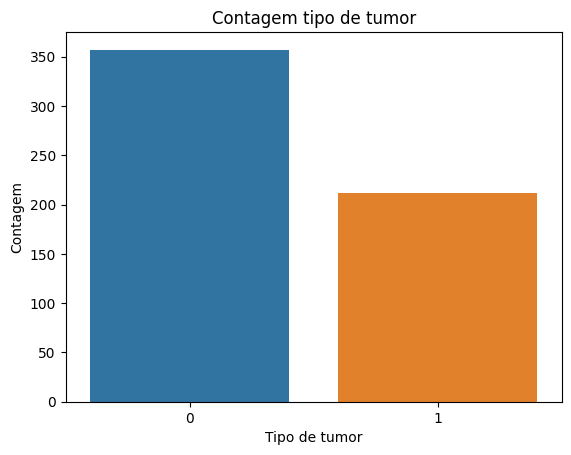

In [8]:
sns.countplot(x=y)
plt.title("Contagem tipo de tumor")
plt.ylabel("Contagem")
plt.xlabel("Tipo de tumor")
plt.show()

## Histograma das colunas

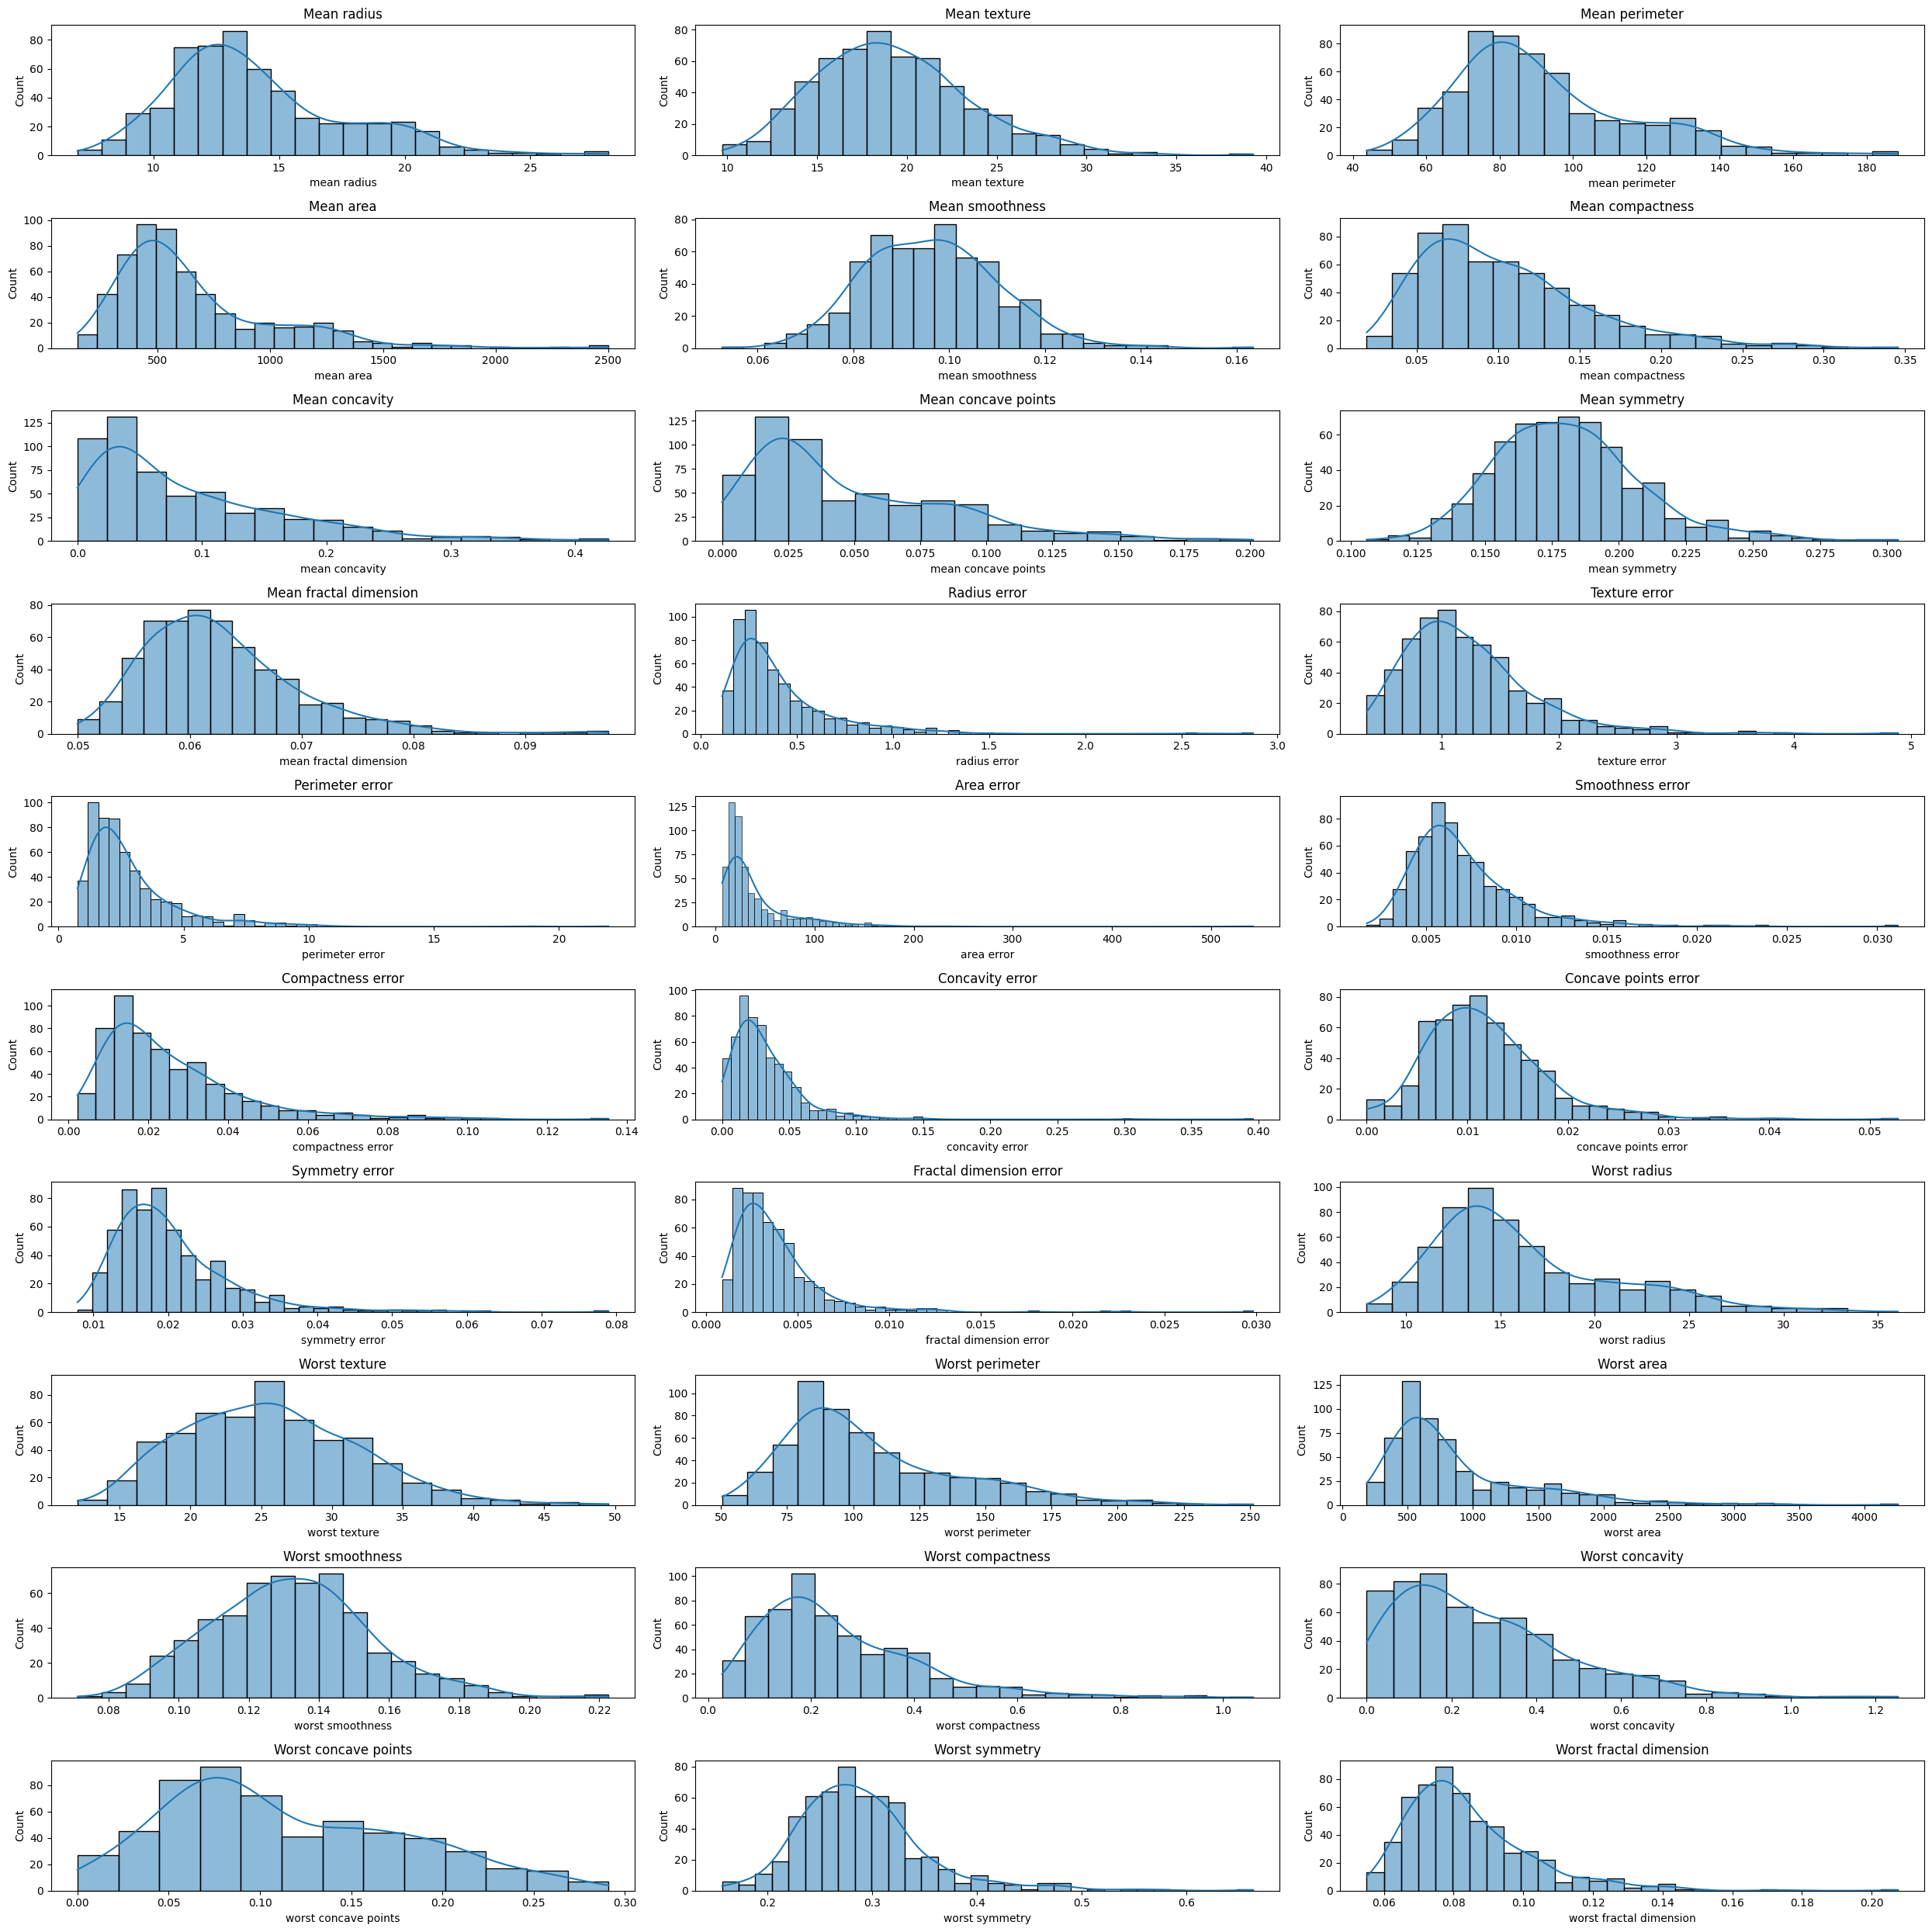

In [9]:
fig, ax = plt.subplots(10, 3, figsize=(25, 25))
ax = ax.ravel()
for i, col in enumerate(X.columns):
    sns.histplot(X[col], kde=True, ax=ax[i])
    ax[i].set_title(col.capitalize())
plt.tight_layout()
plt.show()

## PCA para visualização dos dados

In [10]:
pca = PCA(n_components=2, svd_solver='full')
pca.fit(X)

PCA(n_components=2, svd_solver='full')

In [11]:
X_pca = pd.DataFrame(pca.transform(X), columns = ['pca1', 'pca2'])

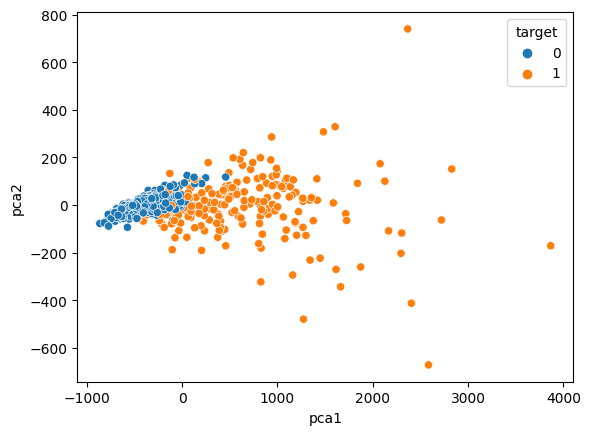

In [12]:
sns.scatterplot(data = X_pca, x='pca1', y='pca2', hue = y)
plt.show()

In [13]:
y.value_counts(normalize=True)

target
0    0.627417
1    0.372583
Name: proportion, dtype: float64

# Escalonamento dos dados

In [14]:
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

# Separação estratificada dos dados em treino e teste

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y, shuffle=True)

In [16]:
y_train.value_counts(normalize=True)

target
0    0.628141
1    0.371859
Name: proportion, dtype: float64

In [17]:
y_test.value_counts(normalize=True)

target
0    0.625731
1    0.374269
Name: proportion, dtype: float64

# Treinando os modelos

## Funções para a matriz de confusão e curva roc dos modelos

In [18]:
def matriz_confusao(y_test, y_pred):
    matriz = confusion_matrix(y_test, y_pred)
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,3))
    fig.suptitle('Matriz de Confusão')
    
    # Mapa de calor com valores absolutos
    sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', ax=ax1)
    ax1.set_xlabel('Valores Preditos')
    ax1.set_ylabel('Valores Observados')

    # Mapa de calor com valores relativos
    sns.heatmap(matriz / np.sum(matriz), annot=True, fmt='.2%', cmap='Blues', ax=ax2)
    ax2.set_xlabel('Valores Preditos')
    ax2.set_ylabel('Valores Observados')

    fig.tight_layout()

In [19]:
def curva_roc(y_test, modelos):
    plt.figure(figsize=(7, 5))
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('Taxa de Falso Positivo')
    plt.ylabel('Taxa de Verdadeiro Positivo')
    plt.title('Curva ROC')

    for nome, modelo in modelos.items():
        y_pred = modelo.predict(X_test)
        model_roc_auc = roc_auc_score(y_test, y_pred)
        fpr, tpr, _ = roc_curve(y_test, modelo.predict_proba(X_test)[:,1])
        plt.plot(fpr, tpr, label=f'{nome} (área = {model_roc_auc:.3f})')

    plt.legend(loc="lower right")
    plt.show()

## Regressão Logística

### Hiperparâmetros modificados:
 - **Penalty**: Cuida da regularização da regressão. Caso nenhuma penalidade seja introduzida, uma variável da regressão pode acabar com um peso muito maior que o das outras. Para solucionar isso, damos a opção das penalidades L1 e L2. De forma geral, essas penalidades adicionam um termo na função custo da regressão, onde para calcular e encontrar o melhor peso para cada variável, a regressão também deverá levar em consideração o resultado de termo extra para o valor final da função custo. Isso faz com que os valor dos pesos tendam a ficar mais equilibrados entre si, e que nenhum valor seja absurdamente mais alto que os demais.
 - **C**: É basicamente uma constante que multiplica os valores da regularização. Um valor muito alto de C pode levar o modelo a um overfitting, enquanto que um valor muito baixo de C pode restringir muito o ajuste do modelo e levar a um underfitting.
 - **Class_Weight**: Lida com o desequilibrio de classes. O dataset possui um desequilibrio de aproximadamente 60-40 entre as classes, e esse hiperparâmetro ajuda a balancear essas clases atribuindo pesos para elas, evitando que o modelo favoreça massivamente uma das classes.
 - **Solver**: Para testar as penalidades L1 e L2, temos que alterar o solucionador da regressão para 'liblinear'. O solucionador padrão não suporta a penalidade L1.

In [20]:
reg = linear_model.LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42)
params_reg = {'penalty':['l2', 'l1', None], 'C':[1.5,1,0.5,0.01]}
search_reg = GridSearchCV(reg, params_reg, cv=5)
search_reg.fit(X_train, y_train)
print(search_reg.best_estimator_)

LogisticRegression(C=1, class_weight='balanced', penalty='l1', random_state=42,
                   solver='liblinear')


In [21]:
reg_final = linear_model.LogisticRegression(C=1, class_weight='balanced', penalty='l1', solver='liblinear', random_state=42)

In [22]:
%%time
reg_final.fit(X_train,y_train)

CPU times: total: 15.6 ms
Wall time: 4 ms


LogisticRegression(C=1, class_weight='balanced', penalty='l1', random_state=42,
                   solver='liblinear')

### Matriz de confusão da regressão logistica:
 - Quadrante superior esquerdo: Verdadeiros negativos; Quadrante superior direito: Falsos positivos
 - Quadrante inferior esquerdo: Falsos negativos; Quadrante inferior direito: Verdadeiros positivos
 - De 64 casos de tumor maligno (representados pelo 1 na target, já que os valores foram invertidos ao criar o y), o modelo detectou corretamente 62, com os outros 2 casos indo para a categoria de falsos negativos.
 - Dos 107 casos de tumor benigno, o modelo conseguiu detectar corretamente 106 deles, com o outro caso indo para a categoria de falso positivo.
 - Portanto, temos 62 dados que eram de tumor maligno que o modelo detectou corretamente, 2 dados que eram de tumor maligno mas o modelo classificou como benigno, 106 dados que eram de tumor benigno e o modelo classificou corretamente e 1 dados que era de tumor benigno mas o modelo classificou como maligno.

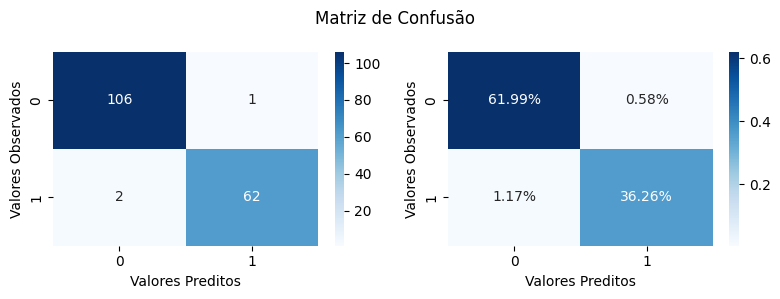

In [23]:
y_reg_pred = reg_final.predict(X_test)
matriz_confusao(y_test, y_reg_pred)

### Recall e Precision
 - Recall é definido pela expressão $\dfrac{VP}{VP+FN}$ em que $VP$ são os verdadeiros positivos e $FN$ os falsos negativos. Verdadeiro positivo representa os pacientes que possuem um tumor maligno, e falso negativo representa um paciente que possui um tumor maligno, mas o modelo indicou que não possui.
 - Precision é definido pela expressão $\dfrac{VP}{VP+FP}$ em que $VP$ são os verdadeiros positivos e $FP$ os falsos positivos. O falso positivo é o paciente que não possui um tumor maligno, mas o modelo indicou que possui.

In [24]:
print(classification_report(y_test, y_reg_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       107
           1       0.98      0.97      0.98        64

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



## Árvore de Classificação

### Hiperparâmetros modificados:
 - **Criterion**: Usado para selecionar a métrica que será utilizada para ajudar a decidir como os nós da árvore serão dividios, medindo a qualidade da divisão. Podemos selecionar três opções, sendo elas a entropia, gini e log_loss.
 - **Max_depth**: Número máximo de profundidade da árvore. Uma profundidade muito alta pode levar ao overfitting e uma profundidade muito baixa, underfitting.
 - **Min_samples_split**: Número mínimo de amostras necessárias para que o algoritmo continue com os calculos e continue formando nós e divisões. 
 - **Class_Weight**: Lida com o desequilibrio de classes. O dataset possui um desequilibrio de aproximadamente 60-40 entre as classes, e esse hiperparâmetro ajuda a balancear essas clases atribuindo pesos para elas, evitando que o modelo favoreça massivamente uma das classes.

In [25]:
dtc = DecisionTreeClassifier(class_weight='balanced', random_state=42)
params_dtc = {'criterion': ['gini', 'entropy'], 'max_depth': [3, 4, 5, 6, 7, 8], 'min_samples_split': [1, 2, 3, 4, 5, 6]}
search_dtc = GridSearchCV(dtc, params_dtc, cv=5)
search_dtc.fit(X_train, y_train)
print(search_dtc.best_estimator_)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4, random_state=42)


In [26]:
dtc_final = DecisionTreeClassifier(criterion='entropy', max_depth=4, class_weight='balanced', random_state=42)

In [27]:
%%time
dtc_final.fit(X_train, y_train)

CPU times: total: 15.6 ms
Wall time: 9.01 ms


DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4, random_state=42)

In [28]:
y_dtc_pred = dtc_final.predict(X_test)

### Matriz de confusão da árvore de decisão:
 - Quadrante superior esquerdo: Verdadeiros negativos; Quadrante superior direito: Falsos positivos
 - Quadrante inferior esquerdo: Falsos negativos; Quadrante inferior direito: Verdadeiros positivos
 - De 64 casos de tumor maligno (representados pelo 1 na target), o modelo detectou corretamente 56, com os outros 8 casos indo para a categoria de falsos negativos.
 - Dos 107 casos de tumor benigno, o modelo conseguiu detectar corretamente 106 deles, com o outro caso indo para a categoria de falso positivo.
 - Portanto, temos 56 dados que eram de tumor maligno que o modelo detectou corretamente, 8 dados que eram de tumor maligno mas o modelo classificou como benigno, 106 dados que eram de tumor benigno e o modelo classificou corretamente e 1 dados que era de tumor benigno mas o modelo classificou como maligno.

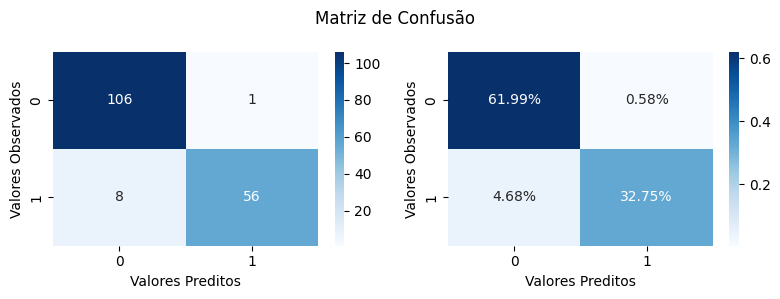

In [29]:
matriz_confusao(y_test, y_dtc_pred)

In [30]:
print(classification_report(y_test, y_dtc_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       107
           1       0.98      0.88      0.93        64

    accuracy                           0.95       171
   macro avg       0.96      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171



## SVC

### Hiperparâmetros modificados:
 - **Kernel**: Especifica o kernel que será utilizado. Basicamente, serve para que o algoritmo consiga mapear os dados em dimensões maiores, buscando sempre o melhor hiperplano para a separação das classes. A difinição do kernel pode levar a overfitting a depender dos valores escolhidos para as variáveis das equações do kernels não lineares.
 - **C**: Constante que multiplica o valor da regularização. Caso o C seja um valor muito alto, pode resultar em overfitting, e caso seja um valor muito baixo, pode resultar em underfitting.
 - **Probability**: Se as estimativas de probabilidade podem ser calculadas ou não.
 - **Gamma**: Coeficiente dos kernels não lineares.
 - **Class_Weight**: Lida com o desequilibrio de classes. O dataset possui um desequilibrio de aproximadamente 60-40 entre as classes, e esse hiperparâmetro ajuda a balancear essas clases atribuindo pesos para elas, evitando que o modelo favoreça massivamente uma das classes.

In [31]:
svc = SVC(class_weight='balanced', probability=True, random_state=42)
params_svc = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [0.90, 0.95, 1, 1.05, 1.10], 'gamma': ['scale', 'auto']}
search_svc = GridSearchCV(svc, params_svc, cv=5)
search_svc.fit(X_train, y_train)
print(search_svc.best_estimator_)

SVC(C=1, class_weight='balanced', probability=True, random_state=42)


In [32]:
svc_final = SVC(C=1, class_weight='balanced', probability=True, random_state=42)

In [33]:
%%time
svc_final.fit(X_train, y_train)

CPU times: total: 15.6 ms
Wall time: 14 ms


SVC(C=1, class_weight='balanced', probability=True, random_state=42)

In [34]:
y_svc_pred = svc_final.predict(X_test)

### Matriz de confusão da árvore de decisão:
 - Quadrante superior esquerdo: Verdadeiros negativos; Quadrante superior direito: Falsos positivos
 - Quadrante inferior esquerdo: Falsos negativos; Quadrante inferior direito: Verdadeiros positivos
 - De 64 casos de tumor maligno (representados pelo 1 na target), o modelo detectou corretamente 62, com os outros 2 casos indo para a categoria de falsos negativos.
 - Dos 107 casos de tumor benigno, o modelo conseguiu detectar corretamente todos os 107.
 - Portanto, temos 62 dados que eram de tumor maligno que o modelo detectou corretamente, 2 dados que eram de tumor maligno mas o modelo classificou como benigno, e 107 dados que eram de tumor benigno que o modelo detectou corretamente.

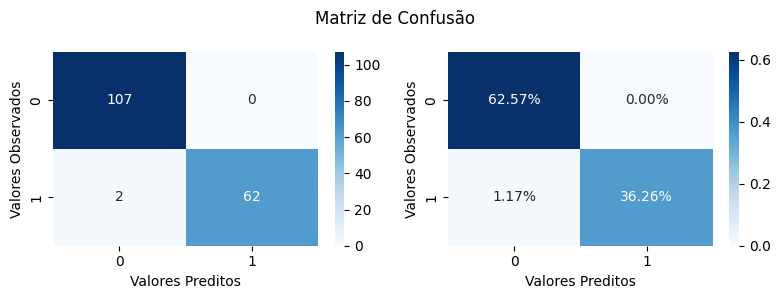

In [35]:
matriz_confusao(y_test, y_svc_pred)

In [36]:
print(classification_report(y_test, y_svc_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       107
           1       1.00      0.97      0.98        64

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171



## KNN

### Hiperparâmetros modificados:
 - **n_neighbors**: Quantidade de vizinhos que serão analisados para classificar o dado. Valores muito altos para K podem resultar em overfitting e valores muito baixos podem resultar em underfitting.
 - **Metric**: Define qual distância será utilizada para realizar os calculos.
 - **P**: Valor do expoente utilizado por algumas distâncias. Caso P for igual a 1, a distância padrão do algoritmo (minkowski) equivale a distância manhattan, e quando P for igual a 2, equivale a distância euclidiana. Portanto, ao dar opções de valores P que passem pelos valores 1 e 2, é possível dar a opção de apenas duas distâncias no hiperparâmetro metric, sendo elas a minkowski e a chebyshev, por exemplo. Com isso, o algoritmo estará testando, na prática, quatro distâncias diferentes.

In [37]:
knn = KNeighborsClassifier()
params_knn = {'metric': ['minkowski', 'chebyshev'], 'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2, 3, 4]}
search_knn = GridSearchCV(knn, params_knn, cv=5)
search_knn.fit(X_train, y_train)
print(search_knn.best_estimator_)

KNeighborsClassifier(n_neighbors=3, p=1)


In [46]:
knn_final = KNeighborsClassifier(n_neighbors=3, p=1)

In [102]:
%%time
knn_final.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 2 ms


KNeighborsClassifier(n_neighbors=3, p=1)

In [55]:
y_knn_pred = knn_final.predict(X_test)

### Matriz de confusão do KNN:
 - Quadrante superior esquerdo: Verdadeiros negativos; Quadrante superior direito: Falsos positivos
 - Quadrante inferior esquerdo: Falsos negativos; Quadrante inferior direito: Verdadeiros positivos
 - De 64 casos de tumor maligno (representados pelo 1 na target), o modelo detectou corretamente 60, com os outros 4 casos indo para a categoria de falsos negativos.
 - Dos 107 casos de tumor benigno, o modelo conseguiu detectar corretamente todos os 107.
 - Portanto, temos 60 dados que eram de tumor maligno que o modelo detectou corretamente, 4 dados que eram de tumor maligno mas o modelo classificou como benigno, e 107 dados que eram de tumor benigno que o modelo conseguiu detectar corretamente

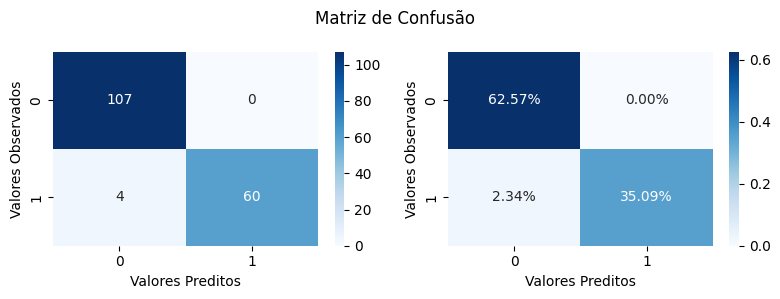

In [56]:
matriz_confusao(y_test, y_knn_pred)

In [57]:
print(classification_report(y_test, y_knn_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       107
           1       1.00      0.94      0.97        64

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



# Gráfico curva ROC

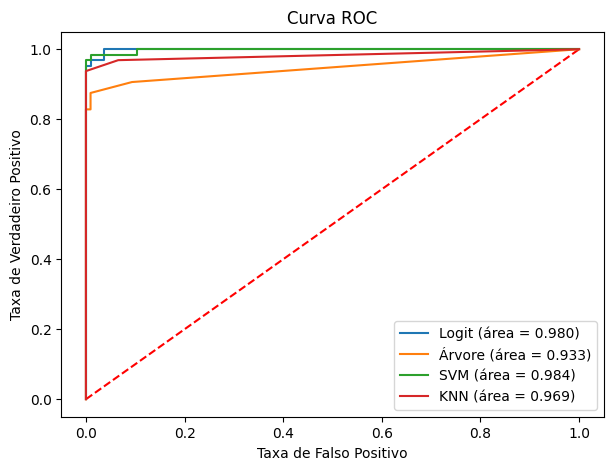

In [58]:
modelos = {"Logit": reg_final, "Árvore": dtc_final, "SVM": svc_final, "KNN": knn_final}
curva_roc(y_test, modelos)

# Escolha do modelo

### O modelo de árvore de decisão apresentou as piores métricas de avaliação, ficando muito abaixo dos demais. Portanto, ele não seria uma boa escolha para esta aplicação.
## Comparando os modelos de Regressão Logistica, KNN e SVM 
### Temos que o modelo de KNN não obteve nenhum falso positivo, e um tempo de execução total de 2ms. Ele tem um tempo de execução 2x menor que o modeol de regressão logistica e 7x menor que o de SVM e sua curva ROC é a segunda menor dentre os modelos avaliados. Ele teve quatro casos de falsos negativos, e nessa aplicação em específico, cada falso negativo pode significar a morte de uma pessoa.
### O modelo de SVM foi o modelo com a menor quantidade de erros, tendo apenas dois, e ambos são falsos negativos. Sua curva ROC foi a maior dentre os modelos, mas é basicamente um empate técnico com o modelo de regressão linear. Além disso, seu tempo de execução foi de longe o maior, fazendo com que o modelo fique muito pesado para rodar com um volume maior de dados.
### Já o modelo de regressão logística apresentou um caso de falso positivo e o mesmo número de falsos negativos que o modelo de SVM. Seu tempo de execução é 3.5x menor que o o tempo do SVM, e 2x maior que o do KNN, mas apresentando metade do número de falsos negativos. Sua curva ROC foi a segunda maior, mas como dito, é basicamente um empate com o SVM
### Dado a análise de todos os modelos e levando em conta que essa aplicação trata de potencialmente salvar vidas, o modelo escolhido seria o SVM, mas o seu tempo de execução é extremamente grande, fazendo com que esse não seja o melhor modelo. A regressão logística conseguiu o menor número de falsos negativos, empatado com o SVM e metade em relação ao KNN, teve apenas um caso de falso positivo e seu tempo de execução é muito satisfatório para a quantidade de erros do modelo. Portanto, possindo 3 erros no total (menos que o KNN) e um tempo de execução menor que o SVM, conclui-se que o melhor modelo para essa aplicação é a regressão logística.